In [ ]:
users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]

users

In [ ]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships

In [ ]:
for user in users:
    user["friends"] = []

In [ ]:
users

In [ ]:
# (0, 1)
for i, j in friendships:
 # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

In [ ]:
print(users[0])

In [ ]:
for user in users:
    print("(",user['id'],",",len(user["friends"]),")", end="\n")

In [ ]:
sum([len(user['friends'])  for user in users])

In [ ]:
def number_of_friends(user):
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user) for user in users) #24


total_connections

In [ ]:
[number_of_friends(user) for user in users]

In [ ]:
from __future__ import division # integer division is lame
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 2.4



In [ ]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]


sorted(num_friends_by_id, # get it sorted
       key=lambda x: x[1],
      reverse=True) # largest to smallest
# each pair is (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

#num_friends_by_id

In [ ]:
for a in friendships:
    print(a, end=' ')

In [ ]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
    for friend in user["friends"] # for each of user's friends
    for foaf in friend["friends"]] # get each of _their_ friends

In [ ]:
print ([friend["id"] for friend in users[0]["friends"]]) # [1, 2]
print ([friend["id"] for friend in users[1]["friends"]]) # [0, 2, 3]
print ([friend["id"] for friend in users[2]["friends"]]) # [0, 1, 3]

In [ ]:
from collections import Counter 
l = [1,2,3,1,3,4,2]
Counter(l)

In [ ]:
from collections import Counter 

In [ ]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]


In [ ]:
def not_friends(user, other_user):
     """other_user is not a friend if he's not in user["friends"];
     that is, if he's not_the_same as all the people in user["friends"]"""
     return all(not_the_same(friend, other_user)
                for friend in user["friends"])


In [ ]:
def friends_of_friend_ids(user):
     return Counter(foaf["id"]
                    for friend in user["friends"] # for each of my friends
                    for foaf in friend["friends"] # count *their* friends
                    if not_the_same(user, foaf) # who aren't me
                    and not_friends(user, foaf)) # and aren't my friends

In [ ]:
print(friends_of_friend_ids(users[0]))

In [ ]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [ ]:
len(interests)

In [ ]:
def data_scientists_who_like(target_interest):
     return [user_id
             for user_id, user_interest in interests #(0, "Hadoop")
             if user_interest == target_interest]

In [ ]:
data_scientists_who_like('Python')

In [ ]:
from collections import defaultdict
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
user_ids_by_interest

In [ ]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)


In [ ]:
for user_id, interest in interests:
     interests_by_user_id[user_id].append(interest)

interests_by_user_id

In [ ]:
def most_common_interests_with(user):
     return Counter([interested_user_id
                    for interest in interests_by_user_id[user["id"]]
                    for interested_user_id in user_ids_by_interest[interest]
                    if interested_user_id != user["id"]])

In [ ]:
most_common_interests_with(users[0])

In [ ]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]

In [ ]:
import matplotlib.pyplot as plt
x,y=[],[]
for a,b in salaries_and_tenures:
    y.append(a)
    x.append(b)
plt.scatter(x,y)
plt.show()

In [ ]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

In [ ]:
for salary, tenure in salaries_and_tenures:
     salary_by_tenure[tenure].append(salary)

salary_by_tenure

In [ ]:
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

In [ ]:
salary_by_tenure

It might be more helpful to bucket the tenures:


# Chapter 5

Statistics refers to the mathematics and techniques with which we understand data. It
is a rich, enormous field, more suited to a shelf (or room) in a library rather than a
chapter in a book, and so our discussion will necessarily not be a deep one. Instead,
I’ll try to teach you just enough to be dangerous, and pique your interest just enough
that you’ll go off and learn more.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%inline matplotlib


UsageError: Line magic function `%inline` not found.


In [5]:
num_friends =  np.random.randint(1, 100, 500)
num_friends

array([ 4, 65, 10,  9, 61, 86, 56, 77, 96, 64, 21, 40, 47, 32, 19, 40, 38,
       97,  5, 98, 17, 11, 74, 39, 72, 71, 55,  6, 28, 33, 83, 78, 13,  6,
       91, 92, 31, 55, 43, 71, 52, 86, 86, 75, 44, 45, 28,  9, 76, 76, 25,
       79, 65, 24,  4, 89, 62, 15, 72, 87, 55, 59, 33, 90, 24, 46,  5, 30,
       58, 62, 45, 69, 93,  5, 60, 59, 68, 78, 87, 52, 47, 35, 82, 36, 98,
       98, 64, 78, 98, 80, 61, 61,  6, 41, 10, 10, 23, 60, 60, 71, 28, 39,
       78, 42, 33, 32, 40, 26, 61, 68, 61, 34, 72, 59, 89, 34,  9, 67, 76,
       58, 55, 13, 53, 13, 91, 36, 55, 75, 18, 25, 38, 18, 12, 61, 32, 80,
        9,  2,  3, 34, 62, 25, 96, 80, 52, 68, 12, 70, 87, 58, 81, 73, 64,
       77,  8, 28,  8,  6, 81, 63, 19, 31,  8, 34, 54, 96, 99, 12, 15, 69,
        5, 77,  5, 18, 22, 80, 25, 31, 22, 11,  3, 61, 73, 53, 28, 35, 90,
       62, 79, 79, 63, 63, 83, 26, 70, 19, 65, 29,  3, 90, 91, 78, 58, 92,
       88, 66, 70, 18, 88, 24, 43, 68, 36, 73, 11, 71, 25, 65, 97, 86, 63,
       59, 14, 30, 85, 30

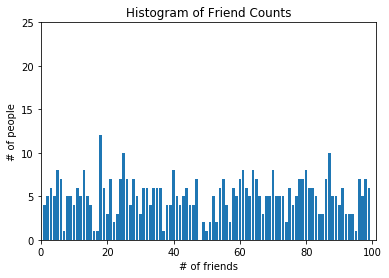

In [7]:
from collections import Counter

friend_counts = Counter(num_friends)
xs = range(101)
# largest value is 100
ys = [friend_counts[x] for x in xs]
# height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [8]:
num_points = len(num_friends)
num_points

500

In [9]:
argest_value = max(num_friends)
smallest_value = min(num_friends)
print(argest_value)
print(smallest_value)

99
1


In [10]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(smallest_value)
print(second_smallest_value)
print(second_largest_value)
print(sorted_values)

1
1
99
[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 49, 49, 50, 51, 51, 52, 52, 52, 52, 52, 53, 53, 54, 54, 54, 54, 54, 54

## Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll
use the mean (or average), which is just the sum of the data divided by its count:

In [11]:
def mean(x):
    return sum(x) / len(x)
mean(num_friends)

50.16

In [13]:
np.mean(num_friends)

50.16

In [15]:
17//2

8

In [18]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2

l1 = [1,5,7,9,10]
l2 = [1,5,7,9,10,12]

print(median(l1))
print(median(l2))

7
8.0


In [17]:
np.median(l1)

7.0

In [19]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.10))
print(quantile(num_friends,0.25))
print(quantile(num_friends,0.75))
print(quantile(num_friends,0.90))


11
25
76
89


In [20]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
    if count == max_count]

In [21]:
mode(num_friends)

[18]

# Dispersion

Dispersion refers to measures of how spread out our data is. Typically they’re statistics
for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out. For instance, a very simple measure is
the range, which is just the difference between the largest and smallest elements:

In [22]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)
data_range(num_friends) 

98

In [23]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

de_mean(num_friends[:5])

[-25.8, 35.2, -19.8, -20.8, 31.2]

In [24]:
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum(np.array(deviations)**2) / (n)

variance(num_friends)

830.9704000000003

In [25]:
np.var(num_friends)

830.9703999999999

### standard deviation:

In [26]:
def standard_deviation(x):
    return np.sqrt(variance(x))
standard_deviation(num_friends) 

28.826557199915502

A more robust alternative computes the difference between the 75th percentile value
and the 25th percentile value:

In [27]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends)

51

In [29]:
l1 = [1,2,4,6]
l2 = [1,2,4,6]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)
covariance(l1, l1) 

4.916666666666667

In [30]:
l1 = [1,2,4,6]
l2 = [1,2,4,6]

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
# if no variation, correlation is zero
correlation(l1, l2) 

1.3333333333333335

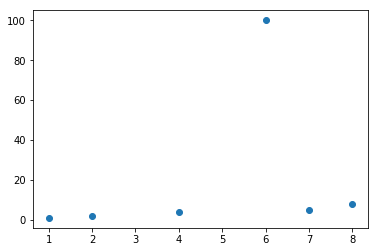

0.34865320625782104


In [31]:
l1 = [1,2,4,6,7,8]
l2 = [1,2,4,100,5,8]

plt.scatter(l1,l2)
plt.show()
print(correlation(l1,l2))

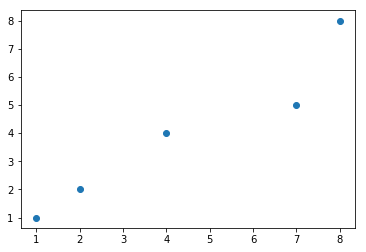

In [33]:
outlier = l1.index(6)
# index of outlier
num_friends_good = [x
                    for i, x in enumerate(l1)
                    if i != outlier]
daily_minutes_good = [x for i, x in enumerate(l2)
                      if i != outlier]
correlation(num_friends_good, daily_minutes_good) # 0.57

plt.scatter(num_friends_good, daily_minutes_good)